In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from models.active_learner import ActiveLearner
from models.random_learner import RandomLearner
from models.teacher import Teacher
from models.self_teacher import SelfTeacher
from models.bayesian_learner import BayesianLearner

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# initialization code to run simulations
n_features = 8
n_iters = 500

# save number of feature observations for each run
active_boundary_obs = np.zeros(n_iters)
random_boundary_obs = np.zeros(n_iters)
teacher_boundary_obs = np.zeros(n_iters)
self_teacher_boundary_obs = np.zeros(n_iters)
bayesian_learner_boundary_obs = np.zeros(n_iters)

# save posterior prob for each run
active_boundary_post = np.zeros((n_iters, n_features + 1))
random_boundary_post = np.zeros((n_iters, n_features + 1))
teacher_boundary_post = np.zeros((n_iters, n_features + 1))
self_teacher_boundary_post = np.zeros((n_iters, n_features + 1))
bayesian_learner_boundary_post = np.zeros((n_iters, n_features + 1))

In [4]:
# run simulations for boundary space
hyp_space_type = "boundary"

for i in range(n_iters):
    # create learners
    active_learner = ActiveLearner(n_features, hyp_space_type)
    random_learner = RandomLearner(n_features, hyp_space_type)
    teacher = Teacher(n_features, hyp_space_type)
    self_teacher = SelfTeacher(n_features, hyp_space_type)
    bayesian_learner = BayesianLearner(n_features, hyp_space_type)
    
    # run simulations for all models
    active_boundary_obs[i], active_boundary_post[i, :], _ = active_learner.run()
    random_boundary_obs[i], random_boundary_post[i, :], _ = random_learner.run()
    teacher_boundary_obs[i], teacher_boundary_post[i, :], _ = teacher.run()
    self_teacher_boundary_obs[i], self_teacher_boundary_post[i, :], _ = self_teacher.run()
    bayesian_learner_boundary_obs[i], bayesian_learner_boundary_post[i, :], _ = bayesian_learner.run()
    

In [5]:
# summarise results for boundary simulations
active_boundary_post_mean = np.mean(active_boundary_post, axis=0)
random_boundary_post_mean = np.mean(random_boundary_post, axis=0)
teacher_boundary_post_mean = np.mean(teacher_boundary_post, axis=0)
self_teacher_boundary_post_mean = np.mean(self_teacher_boundary_post, axis=0)
bayesian_learner_boundary_post_mean = np.mean(bayesian_learner_boundary_post, axis=0)

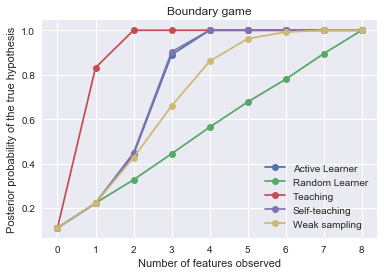

In [19]:
# plot of posterior prob for boundary simulations
features_selected = np.arange(n_features + 1)
plt.plot(features_selected, active_boundary_post_mean, '-o', label='Active Learner')
plt.plot(features_selected, random_boundary_post_mean, '-o', label='Random Learner')
plt.plot(features_selected, teacher_boundary_post_mean, '-o', label='Teaching')
plt.plot(features_selected, self_teacher_boundary_post_mean, '-o', label='Self-teaching')
plt.plot(features_selected, bayesian_learner_boundary_post_mean, '-o', label='Weak sampling')
plt.title("Boundary game")
plt.xlabel("Number of features observed")
plt.ylabel("Posterior probability of the true hypothesis")
plt.legend()
plt.show()
fig = plt.figure()
fig.savefig('figures/boundary_performance.png')

In [30]:
# calculate first feature prob for boundary game
n_features = 8
features_arr = np.arange(n_features)
hyp_space_type = "boundary"
boundary_hyp_one = np.array([1, 1, 1, 1, 1, 1, 1, 1])
boundary_hyp_two = np.array([0, 0, 0, 0, 1, 1, 1, 1])

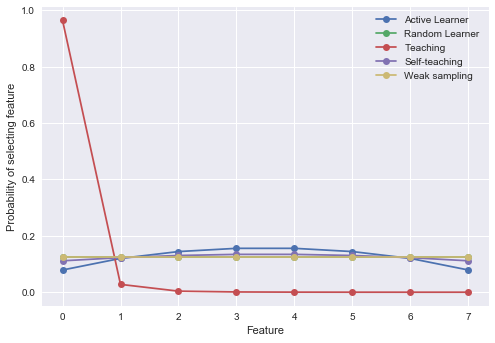

In [31]:
# instantiate models for hyp one
active_learner = ActiveLearner(n_features, hyp_space_type, boundary_hyp_one)
random_learner = RandomLearner(n_features, hyp_space_type, boundary_hyp_one)
teacher = Teacher(n_features, hyp_space_type, boundary_hyp_one)
self_teacher = SelfTeacher(n_features, hyp_space_type, boundary_hyp_one)
bayesian_learner = BayesianLearner(n_features, hyp_space_type, boundary_hyp_one)

_, _, active_learner_prob = active_learner.run()
_, _, random_learner_prob = random_learner.run()
_, _, teacher_prob = teacher.run()
_, _, self_teacher_prob = self_teacher.run()
_, _, bayesian_learner_prob = bayesian_learner.run()

plt.plot(features_arr, active_learner_prob, '-o', label='Active Learner')
plt.plot(features_arr, random_learner_prob, '-o', label='Random Learner')
plt.plot(features_arr, teacher_prob, '-o', label='Teaching')
plt.plot(features_arr, self_teacher_prob, '-o', label='Self-teaching')
plt.plot(features_arr, bayesian_learner_prob, '-o', label='Weak sampling')
plt.xlabel("Feature")
plt.ylabel("Probability of selecting feature")
plt.legend()
plt.show()
fig = plt.figure()
fig.savefig('figures/boundary_feature_prob_one.png')

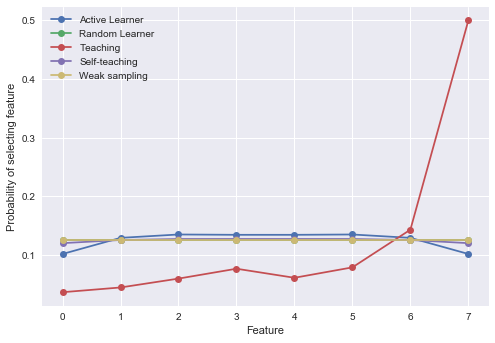

In [21]:
# instantiate models for hyp two
active_learner = ActiveLearner(n_features, hyp_space_type, boundary_hyp_two)
random_learner = RandomLearner(n_features, hyp_space_type, boundary_hyp_two)
teacher = Teacher(n_features, hyp_space_type, boundary_hyp_two)
self_teacher = SelfTeacher(n_features, hyp_space_type, boundary_hyp_two)
bayesian_learner = BayesianLearner(n_features, hyp_space_type, boundary_hyp_two)

_, _, active_learner_prob = active_learner.run()
_, _, random_learner_prob = random_learner.run()
_, _, teacher_prob = teacher.run()
_, _, self_teacher_prob = self_teacher.run()
_, _, bayesian_learner_prob = bayesian_learner.run()

plt.plot(features_arr, active_learner_prob, '-o', label='Active Learner')
plt.plot(features_arr, random_learner_prob, '-o', label='Random Learner')
plt.plot(features_arr, teacher_prob, '-o', label='Teaching')
plt.plot(features_arr, self_teacher_prob, '-o', label='Self-teaching')
plt.plot(features_arr, bayesian_learner_prob, '-o', label='Weak sampling')
plt.xlabel("Feature")
plt.ylabel("Probability of selecting feature")
plt.legend()
plt.show()
fig = plt.figure()
fig.savefig('figures/boundary_feature_prob_two.png')

In [10]:
# run simulations for line space
# save number of feature observations for each run
active_line_obs = np.zeros(n_iters)
random_line_obs = np.zeros(n_iters)
teacher_line_obs = np.zeros(n_iters)
self_teacher_line_obs = np.zeros(n_iters)
bayesian_learner_line_obs = np.zeros(n_iters)

# save posterior prob for each run
active_line_post = np.zeros((n_iters, n_features + 1))
random_line_post = np.zeros((n_iters, n_features + 1))
teacher_line_post = np.zeros((n_iters, n_features + 1))
self_teacher_line_post = np.zeros((n_iters, n_features + 1))
bayesian_learner_line_post = np.zeros((n_iters, n_features + 1))

hyp_space_type = "line"

In [11]:
for i in range(n_iters):
    # create learners
    active_learner = ActiveLearner(n_features, hyp_space_type)
    random_learner = RandomLearner(n_features, hyp_space_type)
    teacher = Teacher(n_features, hyp_space_type)
    self_teacher = SelfTeacher(n_features, hyp_space_type)
    bayesian_learner = BayesianLearner(n_features, hyp_space_type)
    
    # run simulations for all models
    active_line_obs[i], active_line_post[i, :], _ = active_learner.run()
    random_line_obs[i], random_line_post[i, :], _ = random_learner.run()
    teacher_line_obs[i], teacher_line_post[i, :], _ = teacher.run()
    self_teacher_line_obs[i], self_teacher_line_post[i, :], _ = self_teacher.run()
    bayesian_learner_line_obs[i], bayesian_learner_line_post[i, :], _ = bayesian_learner.run()
    

In [12]:
# summarise results for line simulations
active_line_post_mean = np.mean(active_line_post, axis=0)
random_line_post_mean = np.mean(random_line_post, axis=0)
teacher_line_post_mean = np.mean(teacher_line_post, axis=0)
self_teacher_line_post_mean = np.mean(self_teacher_line_post, axis=0)
bayesian_learner_line_post_mean = np.mean(bayesian_learner_line_post, axis=0)

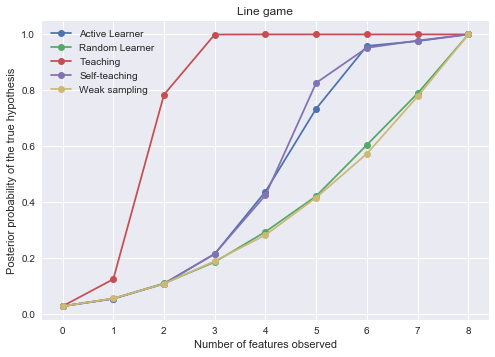

In [22]:
# plot of posterior prob for line simulations
features_selected = np.arange(n_features + 1)
plt.plot(features_selected, active_line_post_mean, '-o', label='Active Learner')
plt.plot(features_selected, random_line_post_mean, '-o', label='Random Learner')
plt.plot(features_selected, teacher_line_post_mean, '-o', label='Teaching')
plt.plot(features_selected, self_teacher_line_post_mean, '-o', label='Self-teaching')
plt.plot(features_selected, bayesian_learner_line_post_mean, '-o', label='Weak sampling')
plt.title("Line game")
plt.xlabel("Number of features observed")
plt.ylabel("Posterior probability of the true hypothesis")
plt.legend()
plt.show()
fig = plt.figure()
fig.savefig('figures/line_performance.png')

In [14]:
# calculate first feature prob for line game
n_features = 8
features_arr = np.arange(n_features)
hyp_space_type = "line"
line_hyp_one = np.array([1, 1, 1, 1, 1, 1, 1, 1])
line_hyp_two = np.array([0, 0, 0, 1, 1, 1, 1, 1])
line_hyp_three = np.array([0, 0, 0, 1, 1, 0, 0, 0])

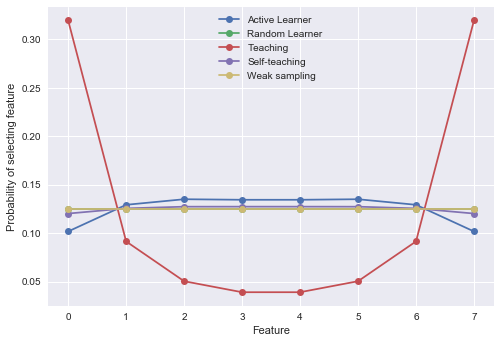

In [23]:
# instantiate models for hyp one
active_learner = ActiveLearner(n_features, hyp_space_type, line_hyp_one)
random_learner = RandomLearner(n_features, hyp_space_type, line_hyp_one)
teacher = Teacher(n_features, hyp_space_type, line_hyp_one)
self_teacher = SelfTeacher(n_features, hyp_space_type, line_hyp_one)
bayesian_learner = BayesianLearner(n_features, hyp_space_type, line_hyp_one)

_, _, active_learner_prob = active_learner.run()
_, _, random_learner_prob = random_learner.run()
_, _, teacher_prob = teacher.run()
_, _, self_teacher_prob = self_teacher.run()
_, _, bayesian_learner_prob = bayesian_learner.run()

plt.plot(features_arr, active_learner_prob, '-o', label='Active Learner')
plt.plot(features_arr, random_learner_prob, '-o', label='Random Learner')
plt.plot(features_arr, teacher_prob, '-o', label='Teaching')
plt.plot(features_arr, self_teacher_prob, '-o', label='Self-teaching')
plt.plot(features_arr, bayesian_learner_prob, '-o', label='Weak sampling')
plt.xlabel("Feature")
plt.ylabel("Probability of selecting feature")
plt.legend()
plt.show()
fig = plt.figure()
fig.savefig('figures/line_feature_prob_one.png')

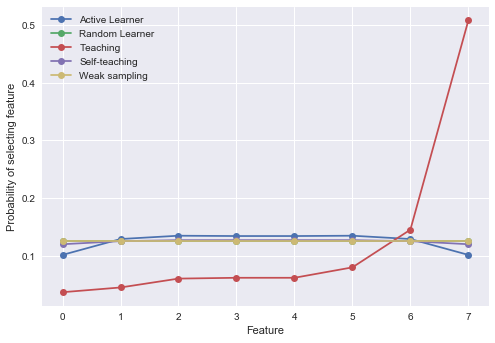

In [24]:
# instantiate models for hyp two
active_learner = ActiveLearner(n_features, hyp_space_type, line_hyp_two)
random_learner = RandomLearner(n_features, hyp_space_type, line_hyp_two)
teacher = Teacher(n_features, hyp_space_type, line_hyp_two)
self_teacher = SelfTeacher(n_features, hyp_space_type, line_hyp_two)
bayesian_learner = BayesianLearner(n_features, hyp_space_type, line_hyp_two)

_, _, active_learner_prob = active_learner.run()
_, _, random_learner_prob = random_learner.run()
_, _, teacher_prob = teacher.run()
_, _, self_teacher_prob = self_teacher.run()
_, _, bayesian_learner_prob = bayesian_learner.run()

plt.plot(features_arr, active_learner_prob, '-o', label='Active Learner')
plt.plot(features_arr, random_learner_prob, '-o', label='Random Learner')
plt.plot(features_arr, teacher_prob, '-o', label='Teaching')
plt.plot(features_arr, self_teacher_prob, '-o', label='Self-teaching')
plt.plot(features_arr, bayesian_learner_prob, '-o', label='Weak sampling')
plt.xlabel("Feature")
plt.ylabel("Probability of selecting feature")
plt.legend()
plt.show()
fig = plt.figure()
fig.savefig('figures/line_feature_prob_two.png')

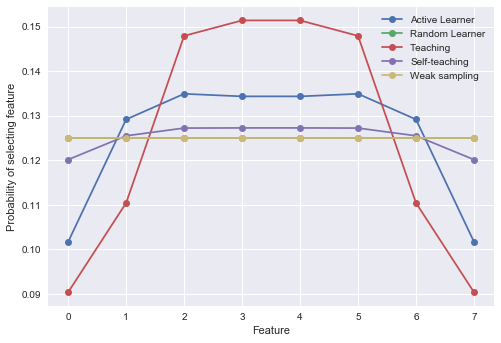

In [25]:
# instantiate models for hyp three
active_learner = ActiveLearner(n_features, hyp_space_type, line_hyp_three)
random_learner = RandomLearner(n_features, hyp_space_type, line_hyp_three)
teacher = Teacher(n_features, hyp_space_type, line_hyp_three)
self_teacher = SelfTeacher(n_features, hyp_space_type, line_hyp_three)
bayesian_learner = BayesianLearner(n_features, hyp_space_type, line_hyp_three)

_, _, active_learner_prob = active_learner.run()
_, _, random_learner_prob = random_learner.run()
_, _, teacher_prob = teacher.run()
_, _, self_teacher_prob = self_teacher.run()
_, _, bayesian_learner_prob = bayesian_learner.run()

plt.plot(features_arr, active_learner_prob, '-o', label='Active Learner')
plt.plot(features_arr, random_learner_prob, '-o', label='Random Learner')
plt.plot(features_arr, teacher_prob, '-o', label='Teaching')
plt.plot(features_arr, self_teacher_prob, '-o', label='Self-teaching')
plt.plot(features_arr, bayesian_learner_prob, '-o', label='Weak sampling')
plt.xlabel("Feature")
plt.ylabel("Probability of selecting feature")
plt.legend()
plt.show()
fig = plt.figure()
fig.savefig('figures/line_feature_prob_three.png')